#### 0.0 Simulate phone dataset 
##### a) Use numpy.random.normal() to simulate a dataset with the following requirements:
###### Detta simulerar 400 x-v√§rden fr√•n en normalf√∂rdelning med medelv√§rdet 100 och standardavvikelsen 100. D√§refter tas absolutv√§rdet av dessa x-v√§rden. Sedan simuleras 400 brusv√§rden fr√•n en normalf√∂rdelning med medelv√§rdet 0 och standardavvikelsen 50. Slutligen ber√§knas y-v√§rdena enligt formeln y = 2x + 25 + brus. Datam√§ngden plottas sedan med x-v√§rdena p√• x-axeln och y-v√§rdena p√• y-axeln.

Number of points x ‚â• 300 min: 11
Number of points y < 0 kr: 8


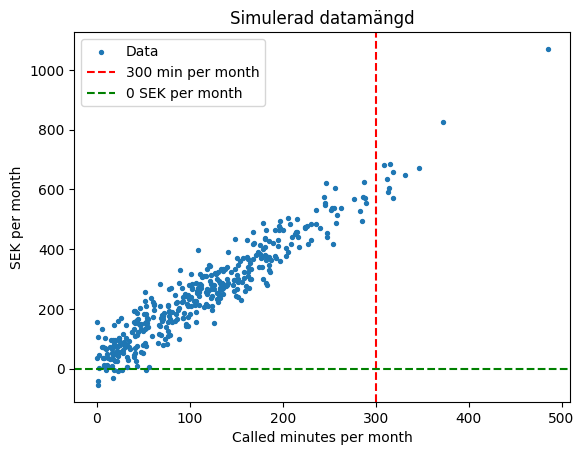

In [175]:
import numpy as np
import matplotlib.pyplot as plt

#s√§tt seed f√∂r reproducerbarhet
np.random.seed(42)

# simulerar 400 x-v√§rden fr√•n en normalf√∂rdelning med mededlv√§rdet 100 och standardavvikelsen 100
X = np.random.normal(loc=100, scale=100, size=400)

# Ta absolutv√§rdet av x-v√§rdena
x_abs = np.abs(X)

# Simulerar 400 brusv√§rden fr√•n en normalf√∂rdelning med medelv√§rdet 0 och standardavvikelsen 50
noise = np.random.normal(loc=0, scale=50, size=400)

# L√•t y = 2x + 25 + brus(‚Ç¨)
y = 2 * x_abs + 25 + noise

# Ber√§kning av v√§rden som √§r under eller lika med 300 och √∂ver 0
print("Number of points x ‚â• 300 min:", np.sum(x_abs >= 300))
print("Number of points y < 0 kr:", np.sum(y < 0))

# Plottar datam√§ngden
plt.scatter(x_abs, y, s=8, label="Data")
plt.axvline(x=300, color='red', linestyle='--', label="300 min per month")
plt.axhline(y=0, color='green', linestyle='--', label="0 SEK per month")
plt.xlabel("Called minutes per month")
plt.ylabel("SEK per month")
plt.title("Simulerad datam√§ngd")
plt.legend()
plt.show()



##### 0.0 b) Now we want to remove some outliers according to this assumption:

Length of x, outliers removed: 400
Length of y, outliers removed: 381


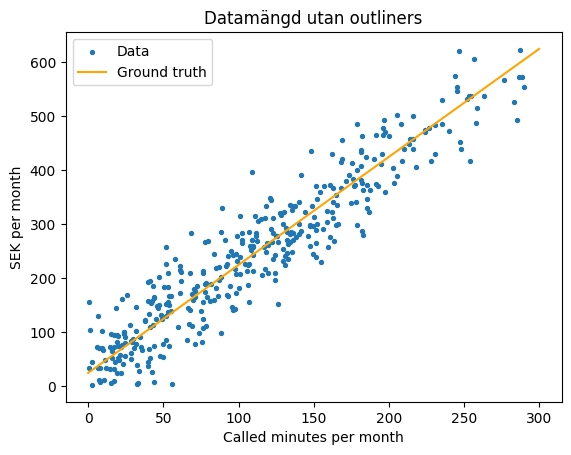

In [176]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Ta bort outliers
filter = (x_abs <= 300)&(y >= 0)
X = x_abs[filter]
y = y[filter]

print("Length of x, outliers removed:", len(x_abs))
print("Length of y, outliers removed:", len(y))

# Plotta den nya datam√§ngden
plt.scatter(X, y, s=8, label="Data")
plt.xlabel("Called minutes per month")
plt.ylabel("SEK per month")
plt.title("Datam√§ngd utan outliners")

# Plotta ground truth med de sanna parametrarna
x_true = np.linspace(0, 300, 100)
y_true = 25 + 2 * x_true
plt.plot(x_true, y_true, color="orange", label="Ground truth")
plt.legend()
plt.show()


#### 0.0 c) Insert the values into a DataFrame

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Skapa en DataFrame
df = pd.DataFrame({
    "Minutes": X,
    "Cost": y
})

print(df.head())


      Minutes        Cost
0  149.671415  244.621448
1   86.173570  167.378389
2  164.768854  354.799893
3  252.302986  531.955001
4   76.584663  155.666051


#### 1. Train|test split
##### Before moving on with linear regression we shall first perform a train-test-split.
##### a) Create a train-test-split function with the following call signature:

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = 0.7, random_state: int = 42, replace: bool = False) -> tuple:
    X_train, X_test, y_train, y_test = tts(X, y, train_size=train_fraction, random_state=random_state, shuffle=not replace)
    return X_train, X_test, y_train, y_test


##### 1b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly

In [179]:
df = pd.DataFrame({
    "Minutes": X,
    "Cost": y
})

# Dela upp data i en tr√§ningssats och en testssats
X_train, X_test, y_train, y_test = train_test_split(df[["Minutes"]], df[["Cost"]])

# Kontrollera att spliten √§r korrekt
print(f"Tr√§ningssatsens storlek:, {len(X_train)}")
print(f"Testsatsens storlek:, {len(X_test)}")
print(f"Tr√§ningssatsens m√•lv√§rden:, {len(y_train)}")
print(f"Testsatsens m√•lv√§rden:, {len(y_test)}")

Tr√§ningssatsens storlek:, 266
Testsatsens storlek:, 115
Tr√§ningssatsens m√•lv√§rden:, 266
Testsatsens m√•lv√§rden:, 115


##### 2. Simple linear regression with normal equation

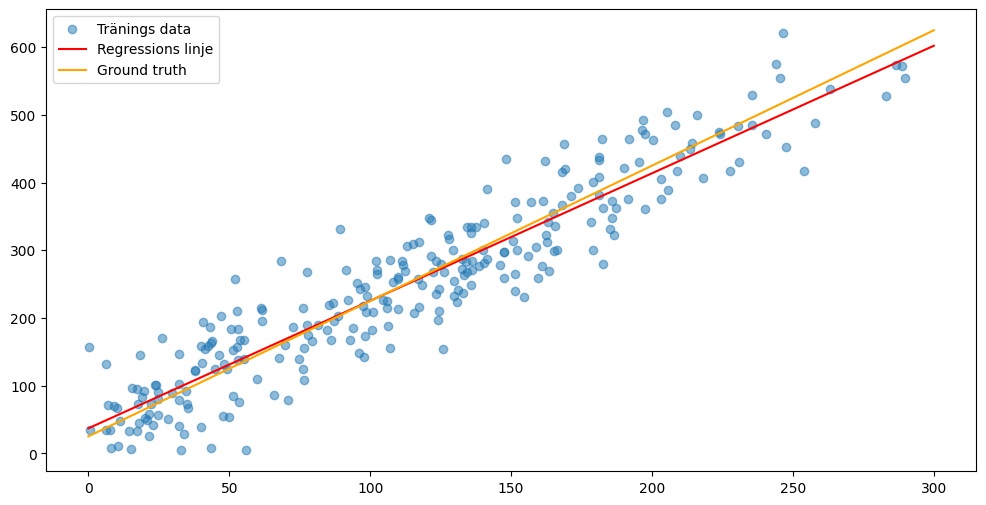

Ber√§kna koefficienterna:
√ü0 (intercept): 36.90
√ü1 (lutning): 1.88


In [180]:
import numpy as np
import matplotlib.pyplot as plt


# L√§gg till en kolumn med 1:or f√∂r att representera bias-termen
X = np.column_stack([np.ones(len(X_train)), X_train["Minutes"]])
y = y_train["Cost"].values

# Ber√§kna beta-koefficienterna med normal ekvation
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Skapa prediktioner f√∂r plotten
x_plot = np.linspace(0, 300, 100)
y_pred = beta[0] + beta[1] * x_plot

plt.figure(figsize=(12, 6))

# Plotta tr√§ningssatsen
plt.scatter(X_train["Minutes"], y_train["Cost"], alpha=0.5, label="Tr√§nings data")

# Plotta regressionslinjen
plt.plot(x_plot, y_pred, color="red", label="Regressions linje")

# Plotta Ground Truth/ x_true kommer fr√•n uppgift 00b).
plt.plot(x_true, 2 * x_true + 25, color="orange", label="Ground truth")

plt.legend()
plt.show()

print(f"Ber√§kna koefficienterna:")
print(f"√ü0 (intercept): {beta[0]:.2f}")
print(f"√ü1 (lutning): {beta[1]:.2f}")


#### 3. Prediction and evaluation
##### a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test.

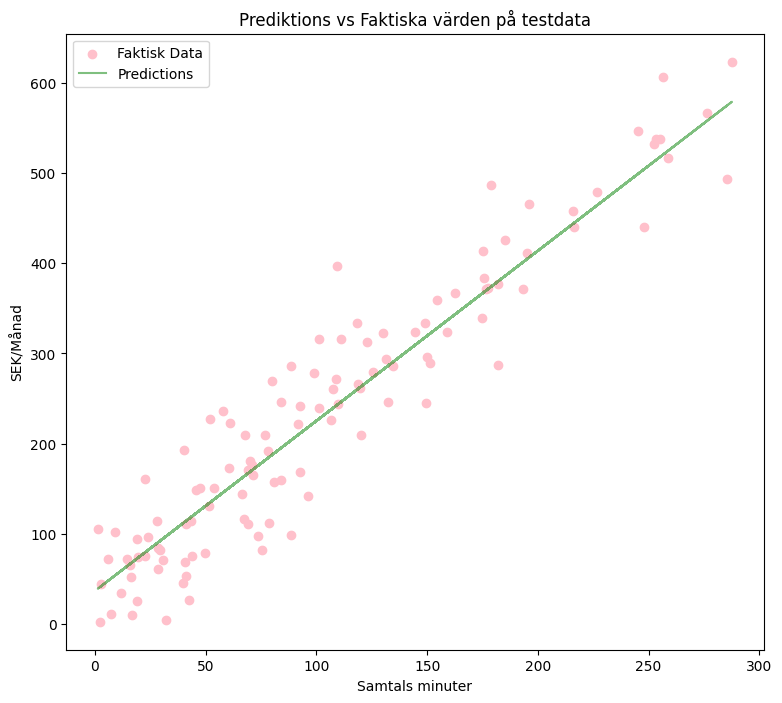

In [181]:
# Skapa design matrix f√∂r testdata
X_test_matrix = np.column_stack([np.ones(len(X_test)), X_test["Minutes"]])

# G√∂r prediktioner med v√•ra ber√§knade beta-koefficienter
y_pred = X_test_matrix @ beta

# Plotta prediktionerna med faktiska v√§rden
plt.figure(figsize=(9, 8))
plt.scatter(X_test["Minutes"], y_test["Cost"], color="Pink", label="Faktisk Data")
plt.plot(X_test["Minutes"], y_pred, color="green", alpha=0.5, label="Predictions")
plt.title("Prediktions vs Faktiska v√§rden p√• testdata")
plt.xlabel("Samtals minuter")
plt.ylabel("SEK/M√•nad")
plt.legend()
plt.show()

#### 3B) Calculate MAE, MSE, RMSE 

#### * MAE st√•r f√∂r Mean Absolute Error, vilket √§r ett m√•tt p√• hur bra en modell presterar p√• en uppgift.
MAE ber√§knas genom att ta absoluta differensen mellan f√∂rutsagda v√§rden och verkliga v√§rden, och sedan ta medelv√§rdet av dessa differenser.

##### Formeln f√∂r MAE √§r:
MAE = (1/n) * ‚àë|y_true - y_pred|

d√§r:

y_true √§r de verkliga v√§rdena
y_pred √§r de f√∂rutsagda v√§rdena
n √§r antalet observationer

#### * MSE st√•r f√∂r Mean Squared Error, vilket √§r ett annat m√•tt p√• hur bra en modell presterar p√• en uppgift.
MSE ber√§knas genom att ta kvadraten p√• differensen mellan f√∂rutsagda v√§rden och verkliga v√§rden, och sedan ta medelv√§rdet av dessa kvadrerade differenser.

##### Formeln f√∂r MSE √§r:
MSE = (1/n) * ‚àë(y_true - y_pred)^2

d√§r:

y_true √§r de verkliga v√§rdena
y_pred √§r de f√∂rutsagda v√§rdena
n √§r antalet observationer

#### * RMSE st√•r f√∂r Root Mean Squared Error, vilket √§r kvadratroten av MSE (Mean Squared Error).

##### Formeln f√∂r RMSE √§r:
RMSE = ‚àöMSE = ‚àö((1/n) * ‚àë(y_true - y_pred)^2)

d√§r:

y_true √§r de verkliga v√§rdena
y_pred √§r de f√∂rutsagda v√§rdena
n √§r antalet observationer

In [182]:
# Ber√§kna MAE, MSE, RMSE

def mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    # Ber√§kna Mean Absolute Error
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    # Ber√§kna Mean squared Error
    return np.mean((y_true - y_pred)**2)

def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    # Ber√§kna Root Mean Squarred Error
    return np.sqrt(mse(y_true, y_pred))

# Konvertera till numpy arrays f√∂r undvikanden av dimensionsproblem
y_test_values = y_test["Cost"].values
y_pred = y_pred.flatten() # S√§kerst√§llande att y_pred har r√§tt dimension

# Ber√§kna utv√§rderingsm√•tten
mae_result = mae(y_test_values, y_pred)
mse_result = mse(y_test_values, y_pred)
rmse_result = rmse(y_test_values, y_pred)

print(f"Utv√§rderingsm√•tt p√• testdata:")
print(f"MAE: {mae_result:.2f}")
print(f"MSE: {mse_result:.2f}")
print(f"RMSE: {rmse_result:.2f}")


Utv√§rderingsm√•tt p√• testdata:
MAE: 37.51
MSE: 2385.18
RMSE: 48.84


#### 4. Simulate more explanatory variables

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:
- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 √∂re
- mean cost per GB: 50kr

##### a) Simulate 10000 samples of each of X1, X2, X3 and Y and save them in a DataFrame. Also add an intercept column containing ones.

In [183]:
import numpy as np
import pandas as pd

# S√§tter seed 42 f√∂r reproducerbarhet
np.random.seed(42)

# Antal sampel, (slumpm√§ssigt genererade v√§rden fr√•n en normalf√∂rdelning.)
n_sample = 10000

# Simulera X1, X2, X3. 
# x_1 = Medelv√§rde 100, standardavvikelsen = kvadratroten av variansen (100). np.abs() ber√§knar absolutv√§rdet av varje element i arrayen.
# x_2 = diskret uniform f√∂rdelning mellan 0 och 50, genererar slumpm√§ssiga v√§rden. Varje v√§rde i arrayen √§r ett heltal. 
# Vill vi ha kontinuerlig uniform f√∂rdelning mellan 0 och 50, d√§r varje v√§rde i arrayen kan vara ett decimaltal = np.random.uniform(0, 50, n_sample)
# Vill vi ha diskret uniform f√∂rdelning mellan 0 och 50, d√§r varje v√§rde i arrayen √§r ett heltal = np.random.choice(np.arange(0, 51), n_samples)
# x_3 = Slumpm√§ssigt genererade v√§rden fr√•n en normalf√∂rdelning med medelv√§rdet 0 och standardavvikelsen 2. V√§rdena kan vara positiva eller negativa. np.abs() tar absolutv√§rdet av varje v√§rde i arrayen, vilket inneb√§r att alla negativa v√§rden blir positiva.
x_1 = np.abs(np.random.normal(100, np.sqrt(100), n_sample))
x_2 = np.random.uniform(0, 50, n_sample)
x_3 = np.abs(np.random.normal(0, 2, n_sample))

# Simulera feltermen Œµ ~ ùí©(0, 50)
epsilon = np.random.normal(0, 50, n_sample)

# Ber√§kna y enligt modellen: y = 25 + 2x1 +0.5x2 + 50x3 + Œµ 
y = 25 + 2 * x_1 + 0.5 * x_2 + 50 * x_3 + epsilon

# Skapa DataFrame 
data = pd.DataFrame({"x_1": x_1, "x_2": x_2, "x_3": x_3, "y": y})

# L√§gg till intercept-kolumn med ettor
data['intercept'] = 1

# Skapa DataFrame med √∂nskade kolumner
df = pd.DataFrame({
    "Intercept": data["intercept"],
    "Minuter": data["x_1"],
    "SMS": data["x_2"],
    "Surf (GB)": data["x_3"],
    "Kostnad": data["y"]
})

# Visa de f√∂rsta raderna av DataFrame
# Kombinera f√∂rsta och sista rader i en snygg utskrift
print(pd.concat([df.head(2), pd.DataFrame([['...']*len(df.columns)], columns=df.columns), df.tail(2)]))


     Intercept     Minuter        SMS Surf (GB)     Kostnad
0            1  104.967142  16.062759  0.958919  307.853958
1            1   98.617357    5.15096  2.056136  307.772968
0          ...         ...        ...       ...         ...
9998         1  104.957656  37.691313  1.013816  368.795384
9999         1  106.443885  44.067762   3.16303    428.9165


#### b) Make histograms for each of the explanatory variables X1, X2, X3 and the response variable y.


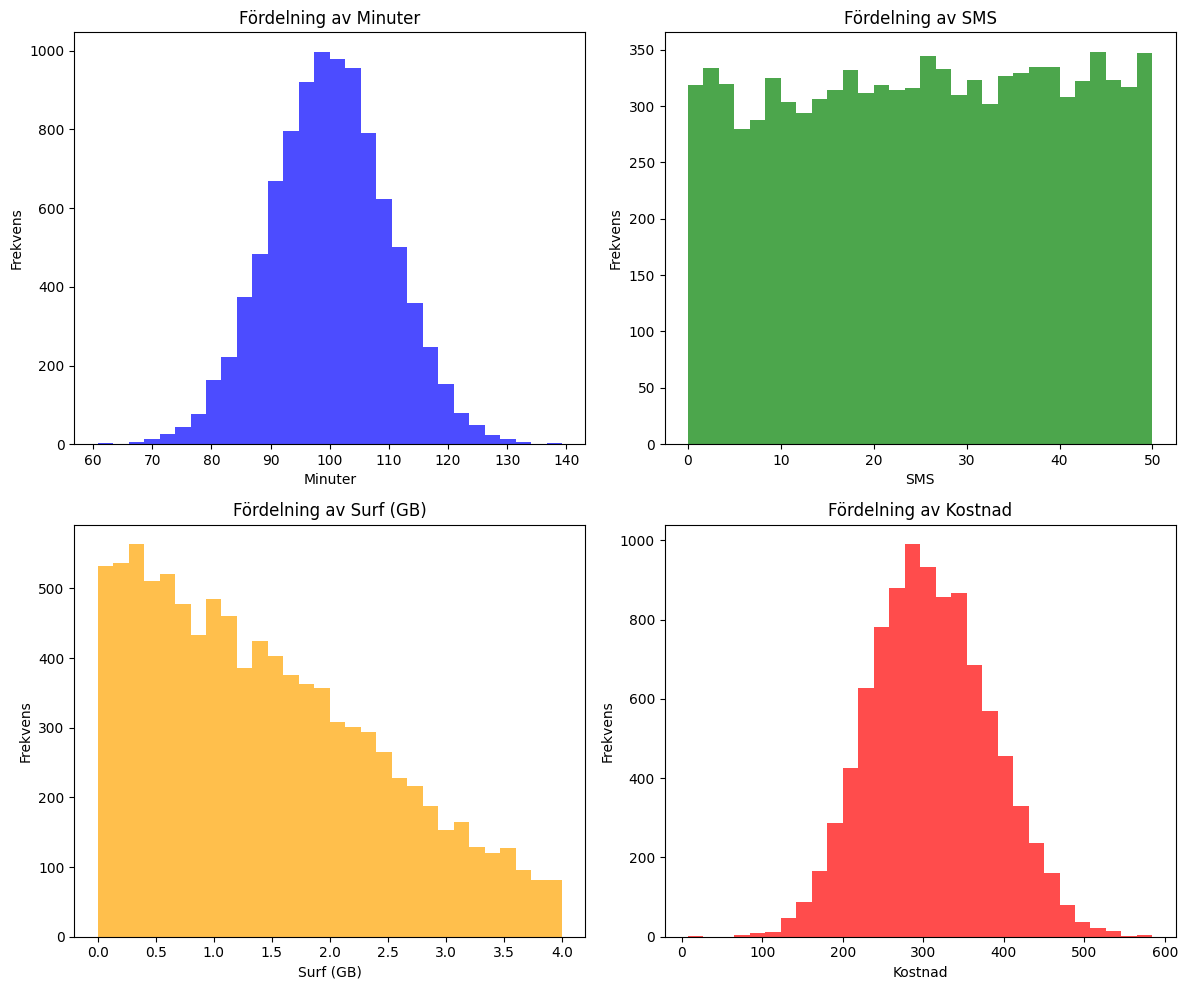

Antal rader f√∂re filtrering: 10000
Antal rader efter filtrering: 9580
Procent av data som beh√•llits: 95.80%


In [184]:
import matplotlib.pyplot as plt

# Skapa mask f√∂r filtrering
mask = (data['x_3'] < 4) & (data['x_1'] < 300) & (data['y'] > 0)
filtered_data = data[mask]

# Skapa en figur med 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Rita histogram f√∂r x_1 (Minuter)
axes[0, 0].hist(filtered_data['x_1'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('F√∂rdelning av Minuter')
axes[0, 0].set_xlabel('Minuter')
axes[0, 0].set_ylabel('Frekvens')

# Rita histogram f√∂r x_2 (SMS)
axes[0, 1].hist(filtered_data['x_2'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('F√∂rdelning av SMS')
axes[0, 1].set_xlabel('SMS')
axes[0, 1].set_ylabel('Frekvens')

# Rita histogram f√∂r x_3 (Surf (GB))
axes[1, 0].hist(filtered_data['x_3'], bins=30, color='orange', alpha=0.7)
axes[1, 0].set_title('F√∂rdelning av Surf (GB)')
axes[1, 0].set_xlabel('Surf (GB)')
axes[1, 0].set_ylabel('Frekvens')

# Rita histogram f√∂r y (Kostnad)
axes[1, 1].hist(filtered_data['y'], bins=30, color='red', alpha=0.7)
axes[1, 1].set_title('F√∂rdelning av Kostnad')
axes[1, 1].set_xlabel('Kostnad')
axes[1, 1].set_ylabel('Frekvens')

# Justera layouten
plt.tight_layout()

# Visa figurerna
plt.show()

# Visa antal rader f√∂re och efter filtrering
print(f"Antal rader f√∂re filtrering: {len(data)}")
print(f"Antal rader efter filtrering: {len(filtered_data)}")
print(f"Procent av data som beh√•llits: {(len(filtered_data)/len(data))*100:.2f}%")

#### 5. Multiple linear regression
a) Perform a train|test split with 0.8 of the data for training

### F√∂rklaring av Tr√§ning/Test-Dela Kod
Denna kod utf√∂r en tr√§ning/test-delning av en dataset f√∂r att f√∂rbereda den f√∂r modelltr√§ning och utv√§rdering.

1. **Importera N√∂dv√§ndiga Bibliotek**:
   ```python
   from sklearn.model_selection import train_test_split

2. **Definiera Datan**:
* X definieras som en DataFrame som inneh√•ller "Minuter", vilket √§r den f√∂rklarande variabeln.
* y definieras som "Kostnad", vilket √§r m√•lvariabeln.

3. **Dela Upp Datan**:
* train_test_split anv√§nds f√∂r att dela upp datan i tr√§nings- och testset, d√§r 80% av datan anv√§nds f√∂r tr√§ning (train_size=0.8).
* random_state=42 s√§kerst√§ller att uppdelningen √§r reproducerbar.

Sammanfattning:
Denna kod √§r en grundl√§ggande del av maskininl√§rning d√§r datan delas upp i tr√§nings- och testset f√∂r att m√∂jligg√∂ra effektiv tr√§ning och utv√§rdering av en modell.

In [185]:
from sklearn.model_selection import train_test_split

# Anta att df √§r din DataFrame och 'Kostnad' √§r m√•let
X = df[['Minuter']]  # Anv√§nd 'Minuter' som f√∂rklarande variabel
y = df['Kostnad']    # M√•lvariabel

# Dela upp datan
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Skriv ut l√§ngden p√• tr√§nings- och testdata
print(f"Tr√§ningsdata storlek: {X_train.shape[0]}")
print(f"Testdata storlek: {X_test.shape[0]}")


Tr√§ningsdata storlek: 8000
Testdata storlek: 2000


#### b) Use the normal equation to compute $\hat{\beta}$
H√§r ber√§knas koefficienterna med normalekvationen, d√§r X_train_with_intercept inneh√•ller en kolumn av ettor f√∂r interceptet och "Minuter" som den enda f√∂rklarande variabeln.
* Resultatet [114.19555438, 2.01849911] inneb√§r att:
  * Intercept: 114.20 (det f√∂rv√§ntade v√§rdet av "Kostnad" n√§r "Minuter" √§r 0).
  * Koefficient f√∂r "Minuter": 2.02 (f√∂r varje enhets√∂kning i "Minuter" √∂kar "Kostnad"
  med cirka 2.02).

In [186]:
import numpy as np
from sklearn.model_selection import train_test_split

# Anta att df √§r din DataFrame med 'Minuter' och 'Kostnad'
X = df[['Minuter']]  # F√∂rklarande variabel
y = df['Kostnad']    # M√•lvariabel

# Dela upp datan i tr√§nings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# L√§gg till en kolumn av ettor f√∂r intercept
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Ber√§kna beta med normalekvationen
beta_hat = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ (X_train_with_intercept.T @ y_train)

# Visa resultatet
print("Ber√§knade koefficienter (beta):", beta_hat)

Ber√§knade koefficienter (beta): [116.46855104   1.98465701]


#### Annat exempel p√• uppgift 5a) och 5b)

In [187]:
import numpy as np

# df = pd.DataFrame({'Minuter': x_filtered, 'Kostnad': y_filtered})

# Blanda datan f√∂r att s√§kerst√§lla att den √§r slumpm√§ssigt f√∂rdelad
df = df.sample(frac=1, random_state=42)

# Ber√§kna antalet rader f√∂r tr√§ningsdata
train_size = int(0.8 * len(df))

# Dela upp datan i tr√§nings- och testset
X_train = df[['Minuter']].iloc[:train_size]
X_test = df[['Minuter']].iloc[train_size:]
y_train = df[['Kostnad']].iloc[:train_size]
y_test = df[['Kostnad']].iloc[train_size:]

# Skriv ut l√§ngden p√• tr√§nings- och testdata
print(f"L√§ngd av X_train: {len(X_train)}")
print(f"L√§ngd av X_test: {len(X_test)}")
print(f"L√§ngd av y_train: {len(y_train)}")
print(f"L√§ngd av y_test: {len(y_test)}")

# Kontrollera att tr√§nings- och testdata inte √∂verlappar
train_indices = X_train.index
test_indices = X_test.index
overlap = set(train_indices).intersection(set(test_indices))
print(f"√ñverlappande index mellan tr√§nings- och testdata: {overlap}")

L√§ngd av X_train: 8000
L√§ngd av X_test: 2000
L√§ngd av y_train: 8000
L√§ngd av y_test: 2000
√ñverlappande index mellan tr√§nings- och testdata: set()


In [188]:
import numpy as np

# L√§gg till en kolumn med ettor f√∂r interceptet
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Ber√§kna koefficienterna med normalekvationen
beta_hat = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

print(f"Ber√§knade koefficienter (beta_hat): \n{beta_hat}")

Ber√§knade koefficienter (beta_hat): 
      Kostnad
0  117.080377
1    1.991683


#### C) Predict on the test data and compute MAE, MSE and RMSE

In [189]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# L√§gg till en kolumn med ettor f√∂r interceptet i testdatan
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# G√∂r f√∂ruts√§gelser p√• testdatan
y_pred = X_test_b @ beta_hat

# Ber√§kna MAE, MSE och RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 63.905248816391975
Mean Squared Error (MSE): 6442.205658183149
Root Mean Squared Error (RMSE): 80.26335189975029
